In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("Pharma_Industry.csv")
print(df.shape)
print(df.ndim)
df.head()

(500, 6)
2


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [5]:
print(df.isnull().sum().sum())
print(df.duplicated().sum())

0
0


# 1. EDA and Data Visualization

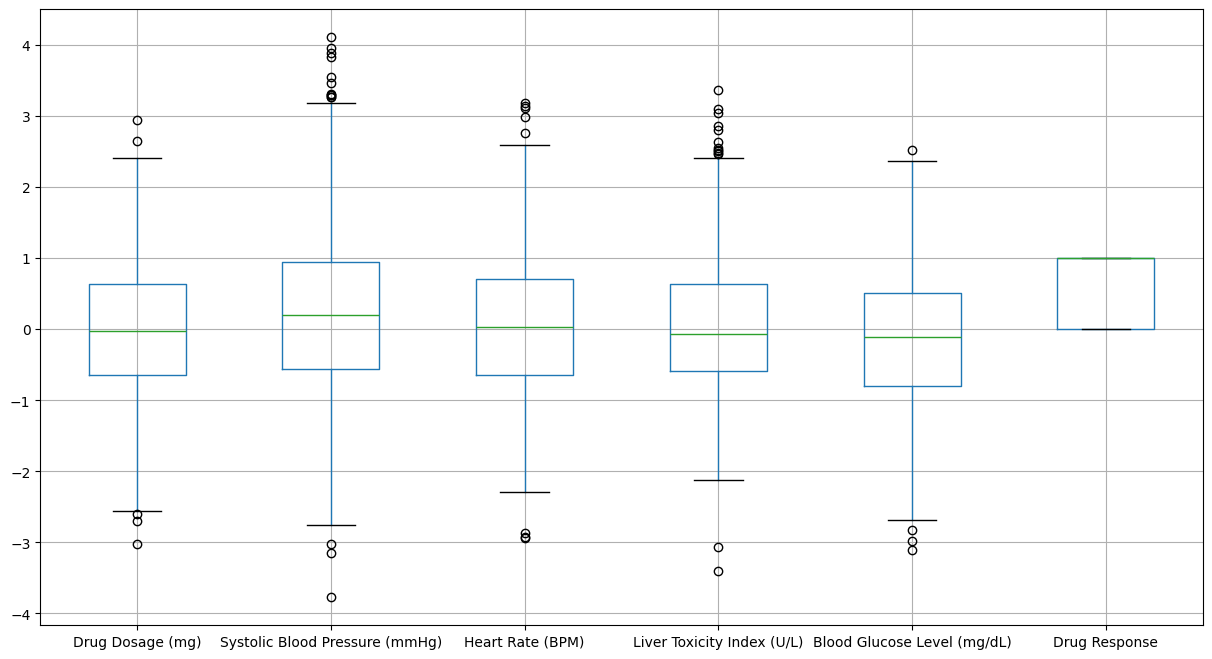

In [6]:
plt.figure(figsize=(15,8))
df.boxplot()
plt.show()

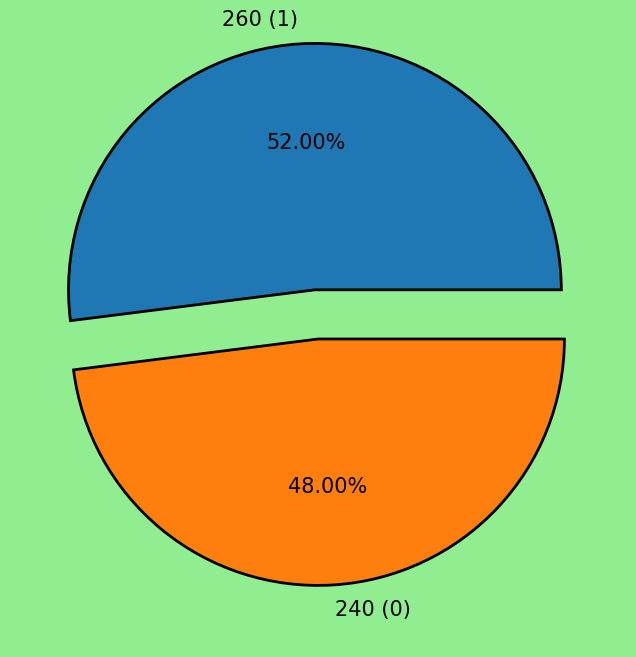

In [7]:
# Pie chart
plt.figure(figsize=(12,8), facecolor="lightgreen")
data = df["Drug Response"].value_counts()
labels = [f"{j} ({i})" for i,j in data.items()]
plt.pie(data, labels=labels, radius=1, autopct="%.2f%%", 
textprops={
    "color":"black",
    "size":15
},
wedgeprops={
    "linewidth":2,
    "edgecolor":"black"
},
explode=[0.2,0]
)
plt.show()

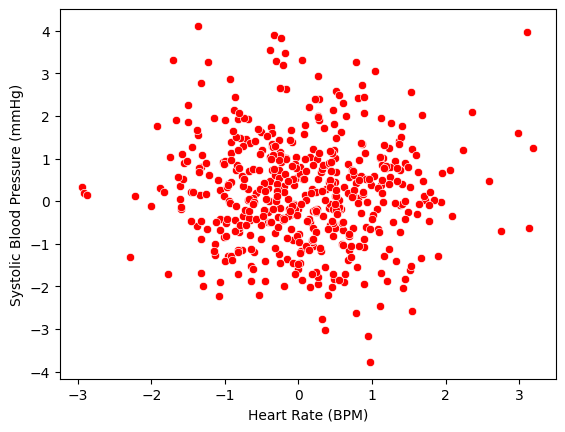

In [8]:
sns.scatterplot(data=df, x=df["Heart Rate (BPM)"], y=df["Systolic Blood Pressure (mmHg)"], color="red")
plt.show()

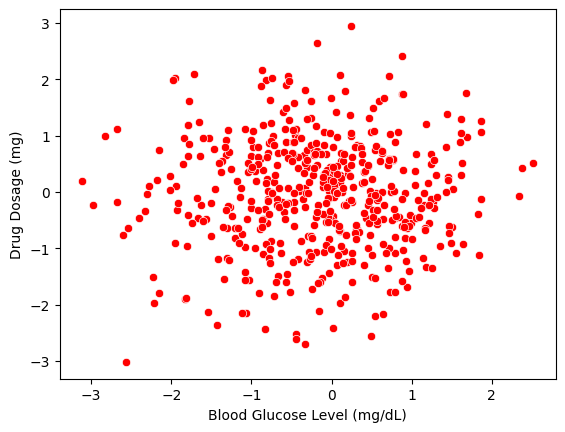

In [9]:
sns.scatterplot(data=df, x=df["Blood Glucose Level (mg/dL)"], y=df["Drug Dosage (mg)"], color="red")
plt.show()

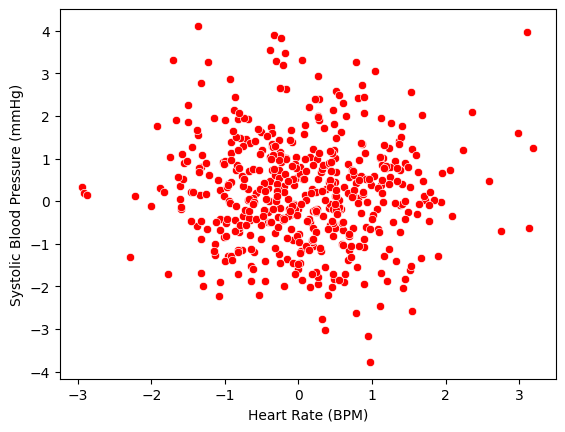

In [10]:
sns.scatterplot(data=df, x=df["Heart Rate (BPM)"], y=df["Systolic Blood Pressure (mmHg)"], color="red")
plt.show()

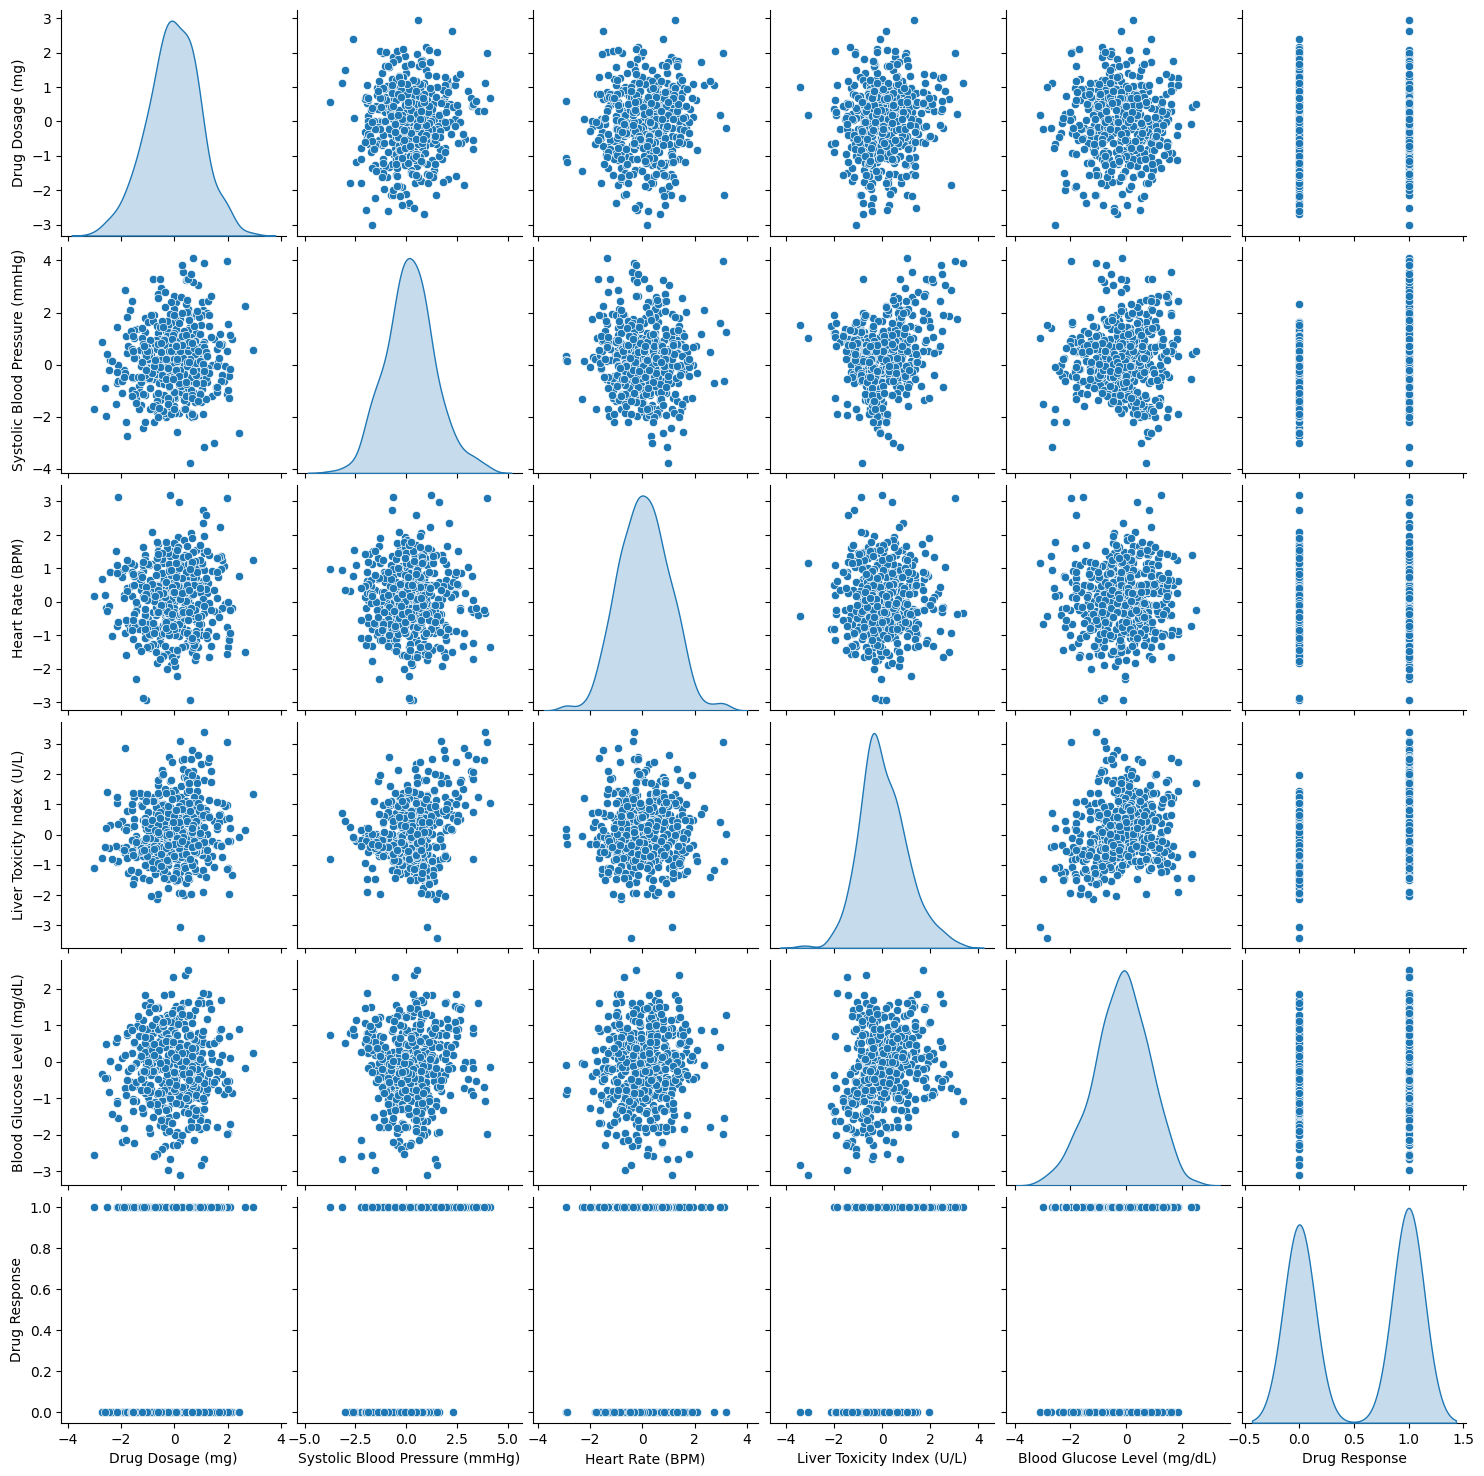

'\n - Liver Toxicity Index (U/L) and Systolic Blood Pressure (mmHg) shows some visible correlation with the scatter plot. \n - Other features doesnt show any slightly obvious correlation between each other.\n\n'

In [11]:
sns.pairplot(df, diag_kind="kde")
plt.show()

'''
 - Liver Toxicity Index (U/L) and Systolic Blood Pressure (mmHg) shows some visible correlation with the scatter plot. 
 - Other features doesnt show any slightly obvious correlation between each other.

'''

<Axes: >

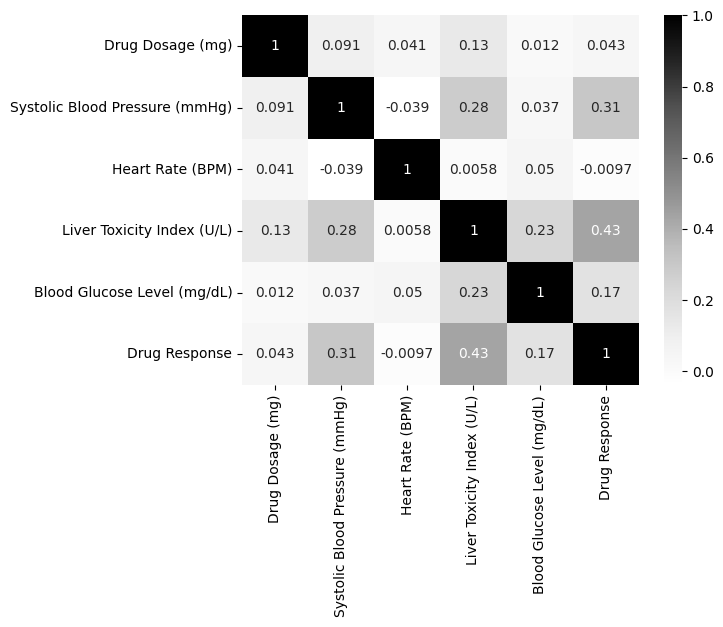

In [12]:
corrs=df.corr()
sns.heatmap(corrs, annot=True, cmap=plt.cm.Greys)

In [13]:
target = df["Drug Response"]
features = df.drop(columns=["Drug Response"])

In [14]:
# Checking the VIF scores for the features

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = features.columns
vif["VIF_SCORES"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

vif.sort_values(ascending=False, by="VIF_SCORES")

'''
VIF scores for all the features seem to be normal
'''

'\nVIF scores for all the features seem to be normal\n'

                         Features  Correlation
3      Liver Toxicity Index (U/L)   116.043884
1  Systolic Blood Pressure (mmHg)    51.161407
4     Blood Glucose Level (mg/dL)    14.702580
0                Drug Dosage (mg)     0.942271
2                Heart Rate (BPM)     0.047005


<Axes: >

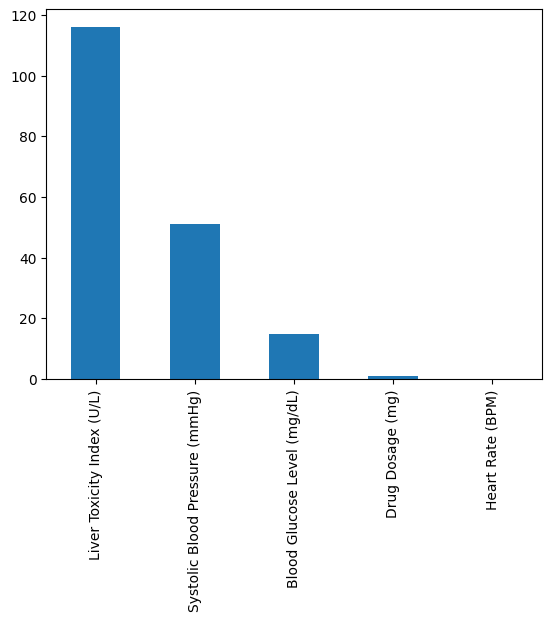

In [15]:
# 4. Finding target correlation with f_class_if

from sklearn.feature_selection import f_classif
fclassif = f_classif(features,target)

corrdf = pd.DataFrame()
corrdf["Features"] = features.columns
corrdf["Correlation"] = fclassif[0]
print(corrdf.sort_values(ascending=False, by="Correlation"))

pd.Series(fclassif[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')

In [16]:
features.drop(columns=["Heart Rate (BPM)", "Blood Glucose Level (mg/dL)", "Drug Dosage (mg)"], inplace=True)

# 2. Data Splitting

In [17]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = 0.8, random_state = 150)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 2)
(100, 2)
(400,)
(100,)


In [18]:
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


# 3. SVC (Linear Kernel)

In [19]:
svc = SVC(C=1,kernel='linear')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_test,y_pred)

0.68

In [20]:
'''We will take the minimum and maximum values for the two most correlated features'''

min_max_values = {
    col: (features[col].min() - 1, features[col].max() + 1)
    for col in features[["Liver Toxicity Index (U/L)", "Systolic Blood Pressure (mmHg)"]].columns
}

min_max_values

{'Liver Toxicity Index (U/L)': (np.float64(-4.401276602059532),
  np.float64(4.373268748881536)),
 'Systolic Blood Pressure (mmHg)': (np.float64(-4.773896544445874),
  np.float64(5.111750595295886))}

In [21]:
h=0.02
xx,yy=np.meshgrid(np.arange(min_max_values["Systolic Blood Pressure (mmHg)"][0],min_max_values["Systolic Blood Pressure (mmHg)"][1],h),np.arange(min_max_values["Liver Toxicity Index (U/L)"][0],min_max_values["Liver Toxicity Index (U/L)"][1],h))
xx.ndim

2

In [22]:
data= np.c_[np.ravel(xx),np.ravel(yy)]
z = svc.predict(data)
data.ndim
z.ndim

c:\Users\Karthik\Desktop\Excelr\Python\Assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


1

In [23]:
z1= z.reshape(xx.shape)
z1.ndim

2

In [24]:
z1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], shape=(439, 495))

In [25]:
d=pd.DataFrame(data,columns=['xx','yy'])
d['z']=z
d

,xx,yy,z
0,-4.773897,-4.401277,0
1,-4.753897,-4.401277,0
2,-4.733897,-4.401277,0
3,-4.713897,-4.401277,0
4,-4.693897,-4.401277,0
...,...,...,...
217300,5.026103,4.358723,1
217301,5.046103,4.358723,1
217302,5.066103,4.358723,1
217303,5.086103,4.358723,1


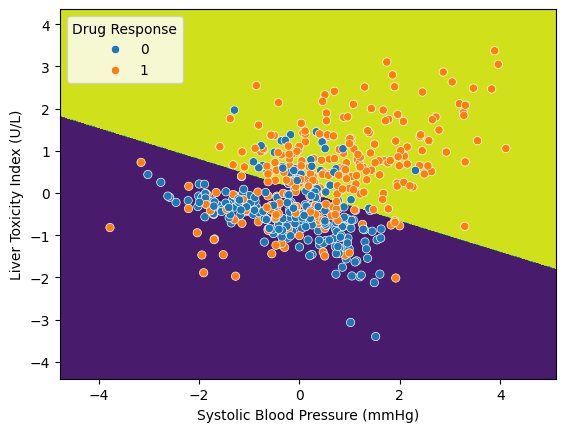

In [26]:
plt.contourf(xx,yy,z1,cmap='viridis')
sns.scatterplot(x=features["Systolic Blood Pressure (mmHg)"],y= features["Liver Toxicity Index (U/L)"],hue=target)
plt.show()

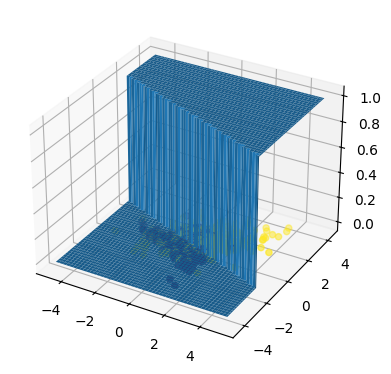

In [27]:
fig= plt.figure(figsize=(10,10))
ax= fig.add_subplot(222,projection='3d')
ax.plot_surface(xx,yy,z1)
ax.scatter(features["Systolic Blood Pressure (mmHg)"],features["Liver Toxicity Index (U/L)"],c=target)
plt.show()

# 4. Poly Kernel

In [28]:
poly= SVC(C=1,kernel='poly')
poly.fit(x_train,y_train)
y_pred= poly.predict(x_test)
accuracy_score(y_test,y_pred)

0.67

In [29]:
z= poly.predict(data)
z1= z.reshape(xx.shape)

c:\Users\Karthik\Desktop\Excelr\Python\Assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


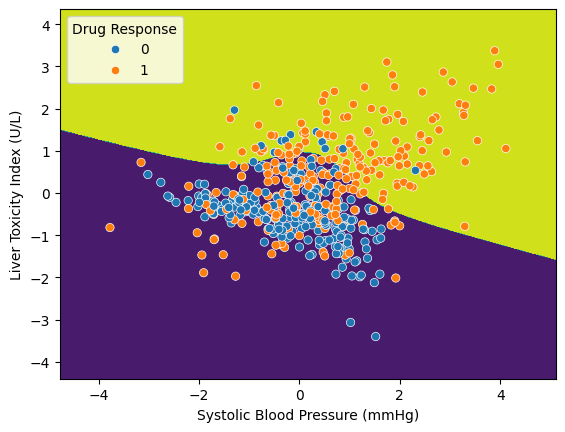

In [30]:
plt.contourf(xx,yy,z1,cmap='viridis')
sns.scatterplot(x=features["Systolic Blood Pressure (mmHg)"],y= features["Liver Toxicity Index (U/L)"],hue=target)
plt.show()

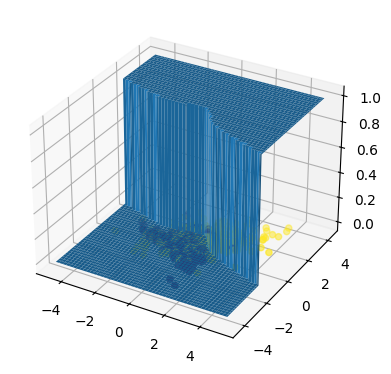

In [31]:
fig= plt.figure(figsize=(10,10))
ax= fig.add_subplot(222,projection='3d')
ax.plot_surface(xx,yy,z1)
ax.scatter(features["Systolic Blood Pressure (mmHg)"],features["Liver Toxicity Index (U/L)"],c=target)
plt.show()

# 5. RBF Kernel

In [48]:
rbf = SVC(C=5,kernel='rbf')
rbf.fit(x_train,y_train)
y_pred = rbf.predict(x_test)
accuracy_score(y_test,y_pred)

0.72

In [33]:
z = rbf.predict(data)
z1 = z.reshape(xx.shape)

c:\Users\Karthik\Desktop\Excelr\Python\Assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


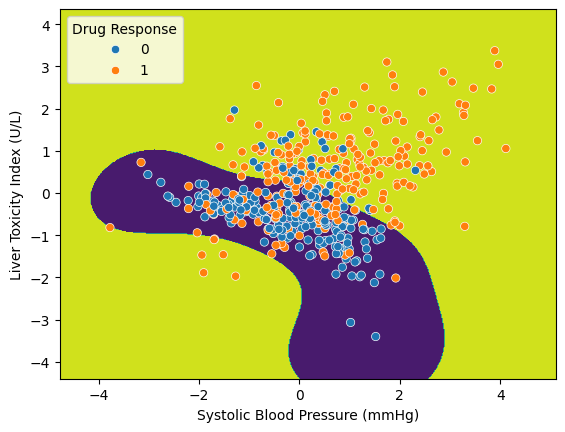

In [34]:
plt.contourf(xx,yy,z1,cmap='viridis')
sns.scatterplot(x=features["Systolic Blood Pressure (mmHg)"],y= features["Liver Toxicity Index (U/L)"],hue=target)
plt.show()

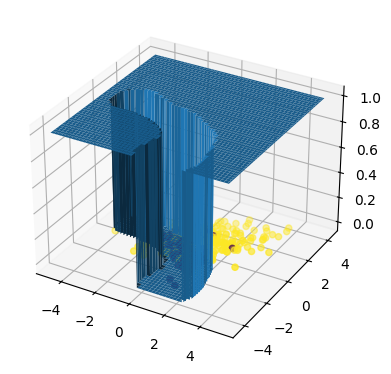

In [35]:
fig= plt.figure(figsize=(10,10))
ax= fig.add_subplot(222,projection='3d')
ax.plot_surface(xx,yy,z1)
ax.scatter(features["Systolic Blood Pressure (mmHg)"],features["Liver Toxicity Index (U/L)"],c=target)
plt.show()

# 6. Sigmoid Kernel

In [42]:
sigmoid= SVC(C=1,kernel='sigmoid',gamma=0.5,coef0=10)
sigmoid.fit(x_train,y_train)
y_pred= sigmoid.predict(x_test)
accuracy_score(y_test,y_pred)

0.56

In [45]:
'''
Tweaking the gamma value and coef0 value for better resutls
'''
sigmoid= SVC(C=1,kernel='sigmoid',gamma=0.1,coef0=0.1)
sigmoid.fit(x_train,y_train)
y_pred= sigmoid.predict(x_test)
accuracy_score(y_test,y_pred)

0.69

In [ ]:
z = svc.predict(data)
z1 = z.reshape(xx.shape)

c:\Users\Karthik\Desktop\Excelr\Python\Assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


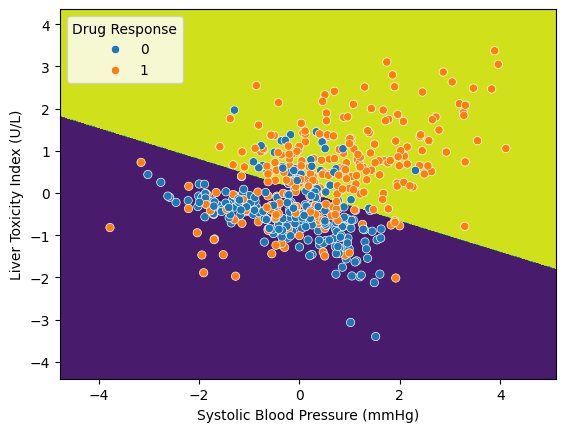

In [38]:
plt.contourf(xx,yy,z1,cmap='viridis')
sns.scatterplot(x=features["Systolic Blood Pressure (mmHg)"],y= features["Liver Toxicity Index (U/L)"],hue=target)
plt.show()

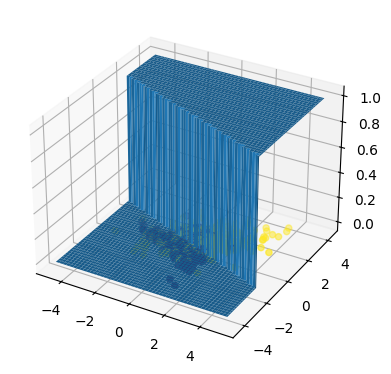

In [39]:
fig= plt.figure(figsize=(10,10))
ax= fig.add_subplot(222,projection='3d')
ax.plot_surface(xx,yy,z1)
ax.scatter(features["Systolic Blood Pressure (mmHg)"],features["Liver Toxicity Index (U/L)"],c=target)
plt.show()

In [ ]:
'''
 Summary

 - The RBF Kernel produced better results comparing to others, probably becasue of it's improved boundary approximation.
 - After tweaking the gamma and coef0 constants for the Sigmoid Kernel, we are able to produce better results. 
 - Support Vector Machines (SVMs) are highly effective in real world classification tasks where data is high dimensional (eg text classification) because they focus on maximizing the margin between classes. They work well with small to medium datasets and can handle non linear decision boundaries using kernel functions. SVMs are robust to overfitting when properly regularized. However, they can be computationally expensive on very large datasets and are less interpretable compared to simpler models like logistic regression.

'''

'\nSupport Vector Machines (SVMs) are highly effective in real world classification tasks where data is high dimensional (eg text classification) because they focus on maximizing the margin between classes. They work well with small to medium datasets and can handle non linear decision boundaries using kernel functions. SVMs are robust to overfitting when properly regularized. However, they can be computationally expensive on very large datasets and are less interpretable compared to simpler models like logistic regression.\n'